# 1. PRE-PROCESSING & CLEANSING OF THE DATASET

IMPORTING THE NECESSARY LIBRARIES.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Set a seed value for NumPy random number generator
SEED=42
np.random.seed(SEED)

READ THE DATASET FROM THE CSV FILE STORED AS 'dataset.csv' IN THE SAME DIRECTORY AS THIS CODE.

In [2]:
df = pd.read_csv('dataset.csv', decimal=",")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902
2,84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,...,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
4,84358402,M,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,...,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678


DISPLAY THE NUMBER OF ROWS & COLUMNS OF THE DATASET.

In [3]:
# shape of our dataset
# df.shape
print("No of rows in dataset:",df.shape[0])
print("No of columns in dataset:",df.shape[1])

No of rows in dataset: 569
No of columns in dataset: 32


CHECK THE INHERENT TYPES OF VALUES CONTAINED IN EACH OF THE COLUMNS/FEATURES OF THE DATASET.

In [4]:
df.dtypes

id                          int64
diagnosis                  object
radius_mean                object
texture_mean               object
perimeter_mean             object
area_mean                  object
smoothness_mean            object
compactness_mean           object
concavity_mean             object
concave points_mean        object
symmetry_mean              object
fractal_dimension_mean     object
radius_se                  object
texture_se                 object
perimeter_se               object
area_se                    object
smoothness_se              object
compactness_se             object
concavity_se               object
concave points_se          object
symmetry_se                object
fractal_dimension_se       object
radius_worst               object
texture_worst              object
perimeter_worst            object
area_worst                 object
smoothness_worst           object
compactness_worst          object
concavity_worst            object
concave points

SINCE, MOST OF THE TYPES ARE LISTED AS OBJECTS; CONVERSION INTO AN NUMERIC TYPE WOULD BE IDEAL FOR CALCULATION. 'DIAGNOSIS' COLUMN ALONE IS AN OBJECT SINCE IT IS A CHARACTER.

In [5]:
# List of columns to convert (excluding 'diagnosis' which seems to be categorical)
columns_to_convert = df.select_dtypes(include=['object']).columns.drop('diagnosis')
df['id'] = df['id'].astype('object')
# Convert to numeric, then to int64
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col].str.replace(',', '.'), errors='coerce').astype('float64')


# Check the dtypes again
print(df.dtypes)

id                          object
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

CHECK IF THERE ARE ANY NULL OR MISSING VALUES IN THE DATASET.

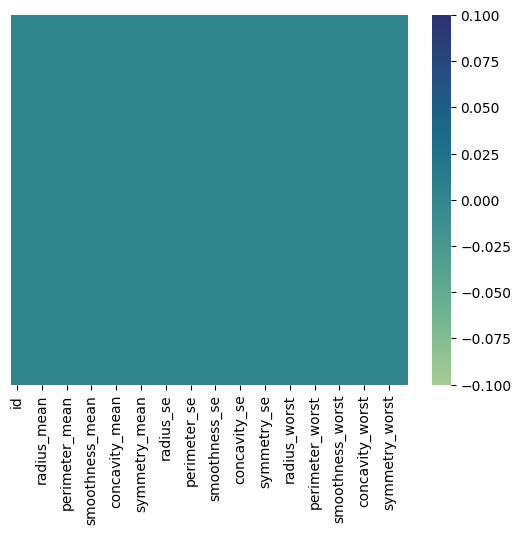

In [6]:
# no null values are now present in the dataset which was provided
sns.heatmap(df.isna(),yticklabels=False,cmap='crest')
plt.show()

REMOVE THE REDUNDANT COLUMNS/FEATURES TO EASE CALCULATION. HERE, STANDARD ERROR AND WORST VALUES OF THE FEATURES ARE ASSUMED TO BE USELESS. ONLY THE AVERAGE VALUES WILL BE CONSIDERED.

In [7]:
df.drop(columns=['radius_se'],inplace=True)
df.drop(columns=['texture_se'],inplace=True)
df.drop(columns=['perimeter_se'],inplace=True)
df.drop(columns=['area_se'],inplace=True)
df.drop(columns=['smoothness_se'],inplace=True)
df.drop(columns=['compactness_se'],inplace=True)
df.drop(columns=['concavity_se'],inplace=True)
df.drop(columns=['concave points_se'],inplace=True)
df.drop(columns=['symmetry_se'],inplace=True)
df.drop(columns=['fractal_dimension_se'],inplace=True)

df.drop(columns=['radius_worst'],inplace=True)
df.drop(columns=['texture_worst'],inplace=True)
df.drop(columns=['perimeter_worst'],inplace=True)
df.drop(columns=['area_worst'],inplace=True)
df.drop(columns=['smoothness_worst'],inplace=True)
df.drop(columns=['compactness_worst'],inplace=True)
df.drop(columns=['concavity_worst'],inplace=True)
df.drop(columns=['concave points_worst'],inplace=True)
df.drop(columns=['symmetry_worst'],inplace=True)
df.drop(columns=['fractal_dimension_worst'],inplace=True)

HANDLING OUTLIERS. OUTLIERS ARE REPLACED WITH THE MEDIAN VALUES OF THEIR RANGE RESPECTIVELY FOR EACH COLUMN.

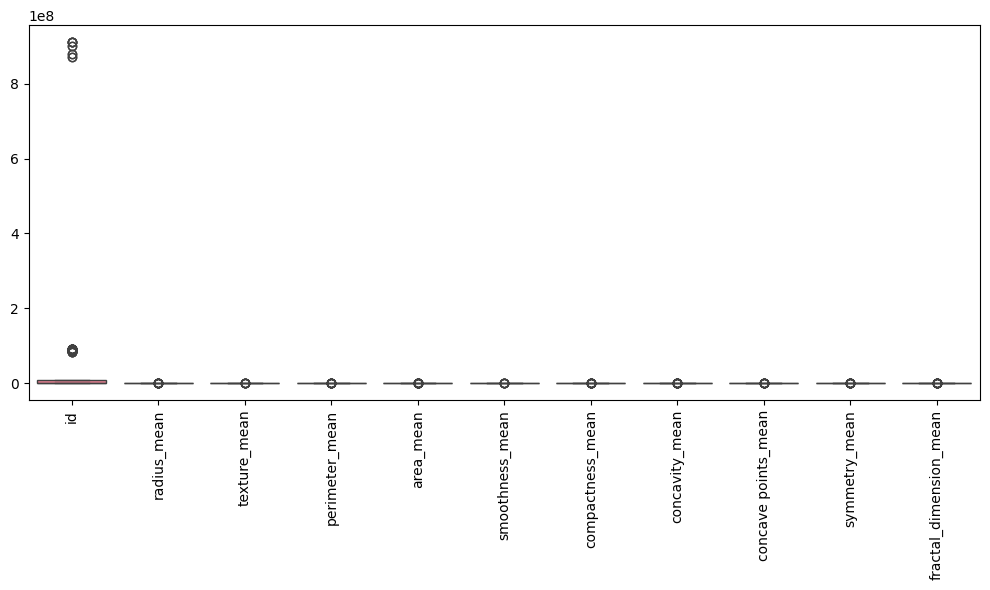

Column: radius_mean
Q1: 11.7
Q3: 15.78
IQR: 4.08
-------------------
Column: texture_mean
Q1: 16.17
Q3: 21.8
IQR: 5.629999999999999
-------------------
Column: perimeter_mean
Q1: 75.17
Q3: 104.1
IQR: 28.929999999999993
-------------------
Column: area_mean
Q1: 420.3
Q3: 782.7
IQR: 362.40000000000003
-------------------
Column: smoothness_mean
Q1: 0.08637
Q3: 0.1053
IQR: 0.018930000000000002
-------------------
Column: compactness_mean
Q1: 0.06492
Q3: 0.1304
IQR: 0.06547999999999998
-------------------
Column: concavity_mean
Q1: 0.02956
Q3: 0.1307
IQR: 0.10114000000000001
-------------------
Column: concave points_mean
Q1: 0.02031
Q3: 0.074
IQR: 0.053689999999999995
-------------------
Column: symmetry_mean
Q1: 0.1619
Q3: 0.1957
IQR: 0.033800000000000024
-------------------
Column: fractal_dimension_mean
Q1: 0.0577
Q3: 0.06612
IQR: 0.008419999999999997
-------------------


In [8]:
# Plotting a boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

# Calculate IQR for each column
for col in df.columns:
    # Skip non-numeric columns
    if df[col].dtype == 'object':
        continue
    
    # Getting the quartile one and quartile 3 values of each column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    # Calculating the interquartile range IQR
    IQR = Q3 - Q1
    
    print(f"Column: {col}")
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print("-------------------")

In [9]:
# now replacing all the outliers using the median of that particular column
# Create a mask for outliers
mask = pd.DataFrame()
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask[col] = (df[col] < lower_bound) | (df[col] > upper_bound)

# Now replacing all the outliers using the median of that particular column
for col in mask.columns:
    # Convert to float (if not already)
    df[col] = df[col].astype('float')
    
    # Calculate median
    temp = df[col].median()
    
    # Replace outliers
    df.loc[mask[col], col] = temp

print("Outliers replaced with median values.")

Outliers replaced with median values.


# SUMMARY OF THE ABOVE PROCESS : 
The dataset was first read by the program. The dimensionality of the dataset was displayed. It was searched for missing values which were not found. Upon manual consideration, it was decided that some of features were unnecessary in the calculation of the final prediction. These columns were dropped in order to simply the dataset. Furthermore, the outliers were handled by replacing them with their column's range's median values. Since, this dataset is from a trusted source, it need not be cleansed to such an extent. Now, we move onto the manually constructed Artificial Neural Network (ANN) that will help predict if the breast cancer is malignant or benign.

# MANUALLY CONSTRUCTED ARTIFCIAL NEURAL NETWORK

THE INPUT VECTOR HAS 10 FEATURES. BUT THE OUTPUT SHOULD ONLY CLASSIFY THE CANCER AS BENIGN OR MALIGNANT I.E. 2 CATEGORIES.

In [10]:
Cancer_label_map = {
    'Benign': 0,
    'Malignant': 1
}

Cancer_index_map = {
    0: 'Benign',
    1: 'Malignant'
}

UPON SURFING THE INTERNET, WE DECIDED TO CALCULATE A 'CANCER VALUE' TO HELP PREDICT WHETHER OR NOT IT IS CANCEROUS. THIS VALUE HAS BEEN CRUDELY APPROXIMATED. IT HAS BEEN CALCULATED BASED ON THE 1ST 5 SAMPLES OF THE DATASET, JUST AS A WAY OF DEPICTING THIS FORMULA.

In [11]:
def get_cancer_bucket(x):
    if x <= 40:
        return Cancer_label_map["Benign"]
    elif x > 40:
        return Cancer_label_map["Malignant"]
    else:
        return np.nan


def normalize_feature(value, feature_min, feature_max):
    return (value - feature_min) / (feature_max - feature_min)

def calculate_cancer_value(features):
    # Feature ranges (min, max) based on 1st 5 samples
    feature_ranges = {
        'radius_mean': (11.42, 20.57),
        'texture_mean': (10.38, 21.25),
        'perimeter_mean': (77.58, 135.1),
        'area_mean': (386.1, 1326),
        'smoothness_mean': (0.08474, 0.1425),
        'compactness_mean': (0.07864, 0.2839),
        'concavity_mean': (0.0869, 0.3001),
        'concave points_mean': (0.07017, 0.1471),
        'symmetry_mean': (0.1809, 0.2597),
        'fractal_dimension_mean': (0.05667, 0.09744)
    }
    
    # Normalize features
    normalized_features = {
        feature: normalize_feature(value, *feature_ranges[feature])
        for feature, value in features.items()
    }
    
    # Weights based on the relative importance observed in the examples
    weights = {
        'radius_mean': 0.15,
        'texture_mean': 0.05,
        'perimeter_mean': 0.15,
        'area_mean': 0.20,
        'smoothness_mean': 0.08,
        'compactness_mean': 0.10,
        'concavity_mean': 0.12,
        'concave points_mean': 0.10,
        'symmetry_mean': 0.03,
        'fractal_dimension_mean': 0.02
    }
    
    cancer_value = sum(normalized_features[feature] * weights[feature] for feature in features)
    
    # Scale to 0-100 range
    return cancer_value * 100

df["Checks"] = (df["radius_mean"] > 0).astype(int) + \
               (df["texture_mean"] > 0).astype(int) + \
               (df["perimeter_mean"] > 0).astype(int) + \
               (df["smoothness_mean"] > 0).astype(int) + \
               (df["compactness_mean"] > 0).astype(int) + \
               (df["concavity_mean"] > 0).astype(int) + \
               (df["concave points_mean"] > 0).astype(int) + \
               (df["symmetry_mean"] > 0).astype(int) + \
               (df["fractal_dimension_mean"] > 0).astype(int) + \
               (df["area_mean"] > 0).astype(int)


df["Cancer_Calculated"] = df.apply(lambda row: calculate_cancer_value({
    'radius_mean': row['radius_mean'],
    'texture_mean': row['texture_mean'],
    'perimeter_mean': row['perimeter_mean'],
    'area_mean': row['area_mean'],
    'smoothness_mean': row['smoothness_mean'],
    'compactness_mean': row['compactness_mean'],
    'concavity_mean': row['concavity_mean'],
    'concave points_mean': row['concave points_mean'],
    'symmetry_mean': row['symmetry_mean'],
    'fractal_dimension_mean': row['fractal_dimension_mean']
}), axis=1)

# Assign a cancer bucket (0 or 1) based on the calculated cancer value
df["Cancer_Bucket"] = df["Cancer_Calculated"].apply(lambda x: get_cancer_bucket(x))

# Optionally, convert numeric labels back to the string labels using Cancer_index_map
df["Cancer_Bucket_Label"] = df["Cancer_Bucket"].apply(lambda x: Cancer_index_map.get(x, np.nan))

# Display rows where the cancer value is calculated
df[~df.Cancer_Calculated.isna()].head()





,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Checks,Cancer_Calculated,Cancer_Bucket,Cancer_Bucket_Label
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.09263,0.06154,0.14710,0.2419,0.07871,10,52.967037,1,Malignant
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,10,52.836972,1,Malignant
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,10,71.888649,1,Malignant
3,84348301,M,11.42,20.38,77.58,386.1,0.09587,0.09263,0.24140,0.10520,0.1792,0.06154,10,20.246672,0,Benign
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,10,66.334897,1,Malignant


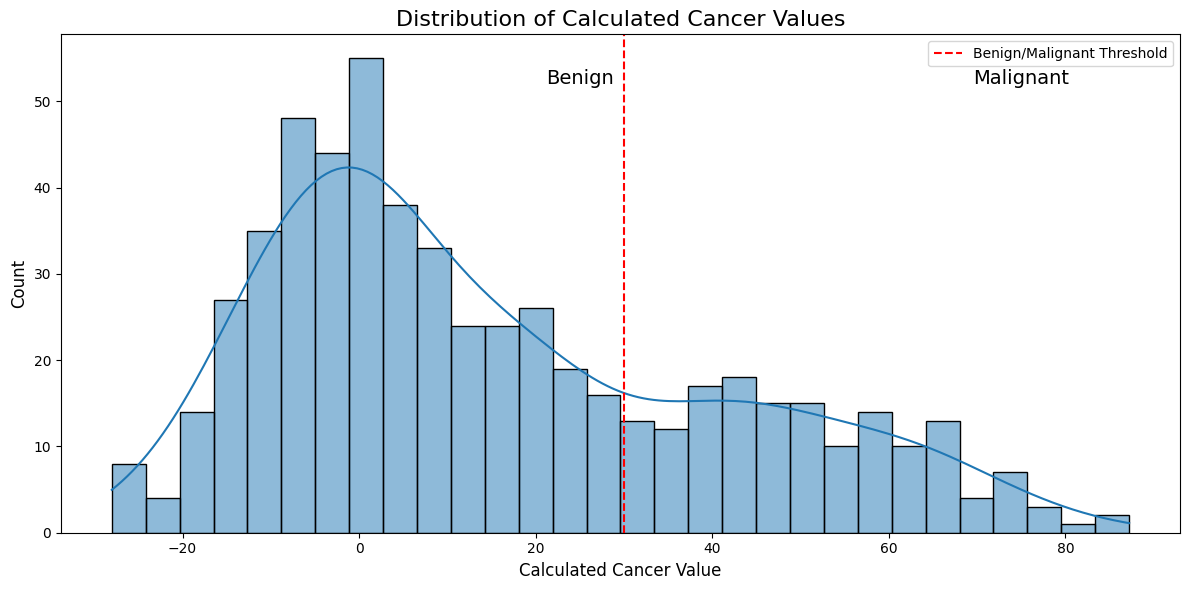

count    569.000000
mean      15.252971
std       25.391385
min      -28.020751
25%       -4.171054
50%        7.853484
75%       33.017601
max       87.222385
Name: Cancer_Calculated, dtype: float64

Value counts for Cancer_Bucket_Label:
Cancer_Bucket_Label
Benign       455
Malignant    114
Name: count, dtype: int64


In [12]:


# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram
sns.histplot(df['Cancer_Calculated'], bins=30, kde=True, ax=ax)

# Add a vertical line for the threshold between Benign and Malignant
plt.axvline(x=30, color='r', linestyle='--', label='Benign/Malignant Threshold')

# Customize the plot
plt.title('Distribution of Calculated Cancer Values', fontsize=16)
plt.xlabel('Calculated Cancer Value', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()

# Add text annotations for Benign and Malignant regions
plt.text(25, plt.ylim()[1]*0.9, 'Benign', fontsize=14, ha='center')
plt.text(75, plt.ylim()[1]*0.9, 'Malignant', fontsize=14, ha='center')

# Show the plot
plt.tight_layout()
plt.show()

# Print some summary statistics
print(df['Cancer_Calculated'].describe())
print("\nValue counts for Cancer_Bucket_Label:")
print(df['Cancer_Bucket_Label'].value_counts())

ACCURACY MATRIX

In [13]:

def get_binary_confusion_matrix(y_pred_labels, y_true_labels):
    confusion_matrix = np.zeros((2, 2))
    
    for true_label, pred_label in zip(y_true_labels, y_pred_labels):
        confusion_matrix[int(true_label), int(pred_label)] += 1
    
    TN, FP, FN, TP = confusion_matrix.ravel()
    
    print("Confusion Matrix:")
    print(confusion_matrix)
    print(f"TN: {TN}, FP: {FP}, FN: {FN}, TP: {TP}")
    
    accuracy = (TP + TN) / np.sum(confusion_matrix)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")
    
    return confusion_matrix, accuracy, precision, recall, f1_score


NAS Model

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skopt import gp_minimize
from skopt.space import Integer, Categorical, Real
from skopt.utils import use_named_args
import time
from typing import Dict, List, Tuple
import pandas as pd
from tabulate import tabulate

# Preprocess dataset
X = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
          'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
          'fractal_dimension_mean']].values  # Features
y = df['Cancer_Bucket'].values  # Target (binary classification: 0 for Benign, 1 for Malignant)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class LayerConfig:
    """Configuration space for a single layer"""
    def __init__(self, layer_type: str, units: int, activation: str, 
                 kernel_size: Tuple[int, int] = None):
        self.layer_type = layer_type
        self.units = units
        self.activation = activation
        self.kernel_size = kernel_size


class ModelLogger:
    def __init__(self):
        self.trials = []
        
    def log_trial(self, trial_num: int, architecture: Dict, metrics: Dict, model_summary: str):
        """Log a single architecture trial"""
        self.trials.append({
            'trial_num': trial_num,
            'architecture': architecture,
            'metrics': metrics,
            'model_summary': model_summary
        })
    
    def display_results(self):
        """Display results in a formatted table"""
        # Create a list of rows for the results table
        rows = []
        for trial in self.trials:
            arch = trial['architecture']
            metrics = trial['metrics']
            
            row = {
                'Trial': trial['trial_num'],
                'Layers': arch['num_layers'],
                'Init Filters': arch['initial_filters'],
                'Activation': arch['initial_activation'],
                'Dropout': f"{arch['dropout_rate']:.2f}",
                'Growth': f"{arch['growth_strategy']}({arch['growth_factor']})",
                'Train Acc': f"{metrics['train_accuracy']:.4f}",
                'Test Acc': f"{metrics['test_accuracy']:.4f}",
                'Time (s)': f"{metrics['training_time']:.1f}"
            }
            rows.append(row)
        
        # Convert to DataFrame for nice display
        df = pd.DataFrame(rows)
        print("\nModel Architecture Trials:")
        print(tabulate(df, headers='keys', tablefmt='pipe', showindex=False))
        
        # Print best model details
        best_trial = max(self.trials, key=lambda x: x['metrics']['test_accuracy'])
        print("\nBest Model Architecture:")
        print("=" * 80)
        print(f"Trial {best_trial['trial_num']}")
        print(f"Test Accuracy: {best_trial['metrics']['test_accuracy']:.4f}")
        print("\nArchitecture Details:")
        for k, v in best_trial['architecture'].items():
            print(f"{k}: {v}")
        #print("\nModel Summary:")
        #print(best_trial['model_summary'])
        


class NASModel:
    def __init__(self):
        # Define the possible layer types and activations
        self.layer_types = ['dense', 'conv2d']
        self.activations = ['relu', 'elu', 'tanh', 'swish', 'sigmoid', 'softmax']
        
        # Define the search space
        self.search_space = [
            Integer(3, 10, name='num_layers'),  # Number of layers
            Integer(16, 64, name='initial_filters'),  # Initial number of units/filters
            Categorical(self.activations, name='initial_activation'),
            Real(0.0, 0.5, name='dropout_rate'),
            Categorical(['multiply', 'add'], name='growth_strategy'),
            Integer(1, 3, name='growth_factor')  # How much to grow layer sizes
        ]
        

    def get_model_summary(self, model) -> str:
        """Get model summary as string"""
        summary_list = []
        model.summary(print_fn=lambda x: summary_list.append(x))
        return '\n'.join(summary_list)

    def create_layer(self, layer_config: LayerConfig) -> layers.Layer:
        """Create a Keras layer from configuration"""
        if layer_config.layer_type == 'dense':
            return layers.Dense(
                units=layer_config.units,
                activation=layer_config.activation
            )
        elif layer_config.layer_type == 'conv2d':
            return layers.Conv2D(
                filters=layer_config.units,
                kernel_size=layer_config.kernel_size or (3, 3),
                activation=layer_config.activation,
                padding='same'
            )
        
    def build_model(self, input_shape: Tuple, 
                   num_layers: int,
                   initial_filters: int,
                   initial_activation: str,
                   dropout_rate: float,
                   growth_strategy: str,
                   growth_factor: int) -> models.Model:
        """Build a model with the given architecture specifications"""
        inputs = layers.Input(shape=input_shape)
        x = inputs
        
        # If using Conv2D, reshape input for 2D operations
        if len(input_shape) == 1:
            # Reshape 1D input to 2D for conv operations
            new_dim = int(np.sqrt(input_shape[0]))
            if new_dim * new_dim != input_shape[0]:
                # If perfect square not possible, use dense layers only
                use_conv = False
                x = inputs
            else:
                use_conv = True
                x = layers.Reshape((new_dim, new_dim, 1))(inputs)
        else:
            use_conv = True
        
        current_units = initial_filters
        
        for i in range(num_layers):
            # Determine layer type
            if use_conv and i < num_layers - 1:  # Last layer always Dense
                layer_type = np.random.choice(self.layer_types)
            else:
                layer_type = 'dense'
            
            # Calculate units for this layer
            if growth_strategy == 'multiply':
                current_units = initial_filters * (growth_factor ** i)
            else:  # 'add'
                current_units = initial_filters + (growth_factor * initial_filters * i)
            
            # Create layer configuration
            layer_config = LayerConfig(
                layer_type=layer_type,
                units=current_units,
                activation=initial_activation,
                kernel_size=(3, 3) if layer_type == 'conv2d' else None
            )
            
            # Add layer
            x = self.create_layer(layer_config)(x)
            
            # Add batch normalization and dropout
            x = layers.BatchNormalization()(x)
            if dropout_rate > 0:
                x = layers.Dropout(dropout_rate)(x)
        
        # Flatten if we used conv layers
        if use_conv:
            x = layers.Flatten()(x)
        
        # Output layer
        outputs = layers.Dense(1, activation='sigmoid')(x)
        
        return models.Model(inputs=inputs, outputs=outputs)

class ModelEvaluator:
    def __init__(self):
        self.results = []
        
    def evaluate_model(self, model, X_train, X_test, y_train, y_test,
                      architecture_params: Dict) -> Dict:
        """Evaluate a model and store its results"""
        start_time = time.time()
        
        # Train the model
        history = model.fit(
            X_train, y_train,
            epochs=10,
            batch_size=32,
            validation_split=0.2,
            callbacks=[tf.keras.callbacks.EarlyStopping(
                patience=3,
                restore_best_weights=True
            )],
            verbose=0
        )
        
        # Evaluate the model
        train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
        test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
        training_time = time.time() - start_time
        
        # Store results
        result = {
            'architecture_params': architecture_params,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'training_time': training_time,
            'history': history.history
        }
        
        self.results.append(result)
        return result

def main():
    # Load and preprocess data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    nas_model = NASModel()
    logger = ModelLogger()
    trial_counter = 0
    
    @use_named_args(nas_model.search_space)
    def objective(**params):
        nonlocal trial_counter
        trial_counter += 1
        
        print(f"\nTrial {trial_counter}:")
        print("-" * 40)
        for name, value in params.items():
            print(f"{name}: {value}")
        
        model = nas_model.build_model(
            input_shape=(X_train.shape[1],),
            **params
        )
        
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        
        # Get model summary
        model_summary = nas_model.get_model_summary(model)
        
        start_time = time.time()
        history = model.fit(
            X_train_scaled, y_train,
            epochs=100,
            batch_size=32,
            validation_split=0.2,
            callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)],
            verbose=0
        )
        
        train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)
        test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
        training_time = time.time() - start_time
        
        metrics = {
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'training_time': training_time,
            'history': history.history
        }
        
        logger.log_trial(trial_counter, params, metrics, model_summary)
        
        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"Training Time: {training_time:.1f}s")
        
        return -test_accuracy
    
    # Perform Bayesian optimization
    result = gp_minimize(
        func=objective,
        dimensions=nas_model.search_space,
        n_calls=10,
        random_state=42
    )
    
    # Display final results
    logger.display_results()
    
    return logger.trials, result

if __name__ == "__main__":
    trials, best_architecture = main()


Trial 1:
----------------------------------------
num_layers: 9
initial_filters: 25
initial_activation: sigmoid
dropout_rate: 0.29842507897324355
growth_strategy: multiply
growth_factor: 1


Train Accuracy: 0.9648
Test Accuracy: 0.9386
Training Time: 5.4s

Trial 2:
----------------------------------------
num_layers: 6
initial_filters: 32
initial_activation: relu
dropout_rate: 0.3254442364744265
growth_strategy: multiply
growth_factor: 2


Train Accuracy: 0.9560
Test Accuracy: 0.9649
Training Time: 3.9s

Trial 3:
----------------------------------------
num_layers: 10
initial_filters: 16
initial_activation: softmax
dropout_rate: 0.3087407548138583
growth_strategy: add
growth_factor: 1


Train Accuracy: 0.7978
Test Accuracy: 0.8070
Training Time: 4.9s

Trial 4:
----------------------------------------
num_layers: 3
initial_filters: 41
initial_activation: tanh
dropout_rate: 0.023332831606807717
growth_strategy: add
growth_factor: 1


Train Accuracy: 0.9846
Test Accuracy: 0.9912
Training Time: 2.7s

Trial 5:
----------------------------------------
num_layers: 4
initial_filters: 46
initial_activation: tanh
dropout_rate: 0.4916154429033942
growth_strategy: multiply
growth_factor: 3


Train Accuracy: 0.9626
Test Accuracy: 0.9649
Training Time: 2.9s

Trial 6:
----------------------------------------
num_layers: 8
initial_filters: 38
initial_activation: relu
dropout_rate: 0.4711008778424265
growth_strategy: add
growth_factor: 2


Train Accuracy: 0.9473
Test Accuracy: 0.9561
Training Time: 7.3s

Trial 7:
----------------------------------------
num_layers: 3
initial_filters: 27
initial_activation: elu
dropout_rate: 0.34163175941272916
growth_strategy: add
growth_factor: 3


Train Accuracy: 0.9802
Test Accuracy: 0.9825
Training Time: 2.4s

Trial 8:
----------------------------------------
num_layers: 4
initial_filters: 35
initial_activation: elu
dropout_rate: 0.37768070515882635
growth_strategy: multiply
growth_factor: 1


Train Accuracy: 0.9582
Test Accuracy: 0.9298
Training Time: 3.1s

Trial 9:
----------------------------------------
num_layers: 7
initial_filters: 18
initial_activation: softmax
dropout_rate: 0.2248770666848829
growth_strategy: multiply
growth_factor: 3


Train Accuracy: 0.7978
Test Accuracy: 0.8070
Training Time: 28.3s

Trial 10:
----------------------------------------
num_layers: 8
initial_filters: 32
initial_activation: swish
dropout_rate: 0.2604171300129119
growth_strategy: add
growth_factor: 3


Train Accuracy: 0.8264
Test Accuracy: 0.8596
Training Time: 4.9s

Model Architecture Trials:
|   Trial |   Layers |   Init Filters | Activation   |   Dropout | Growth      |   Train Acc |   Test Acc |   Time (s) |
|--------:|---------:|---------------:|:-------------|----------:|:------------|------------:|-----------:|-----------:|
|       1 |        9 |             25 | sigmoid      |      0.3  | multiply(1) |      0.9648 |     0.9386 |        5.4 |
|       2 |        6 |             32 | relu         |      0.33 | multiply(2) |      0.956  |     0.9649 |        3.9 |
|       3 |       10 |             16 | softmax      |      0.31 | add(1)      |      0.7978 |     0.807  |        4.9 |
|       4 |        3 |             41 | tanh         |      0.02 | add(1)      |      0.9846 |     0.9912 |        2.7 |
|       5 |        4 |             46 | tanh         |      0.49 | multiply(3) |      0.9626 |     0.9649 |        2.9 |
|       6 |        8 |             38 | relu         |      